In [1]:
import backtrader as bt
import datetime
from backtrader_donchain_strategy import DonchianChannels

In [2]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


In [3]:
data = bt.feeds.YahooFinanceData(dataname='AAPL',
                                  fromdate=datetime.datetime(2017, 1, 1),
                                  todate=datetime.datetime(2019, 12, 31))

In [4]:
class MyStrategy(bt.Strategy):
    def __init__(self):
        self.myind = DonchianChannels()

    def next(self):
        if self.data[0] > self.myind.dch[0]:
            self.buy()
        elif self.data[0] < self.myind.dcl[0]:
            self.sell()

In [5]:
cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
cerebro.broker.setcash(1337.0)
cerebro.broker.setcommission(commission=0.001)

In [6]:
cerebro.adddata(data)

In [7]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1337.00


In [8]:
cerebro.run()

In [9]:
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

Ending Portfolio Value: 2121.58


<IPython.core.display.Javascript object>


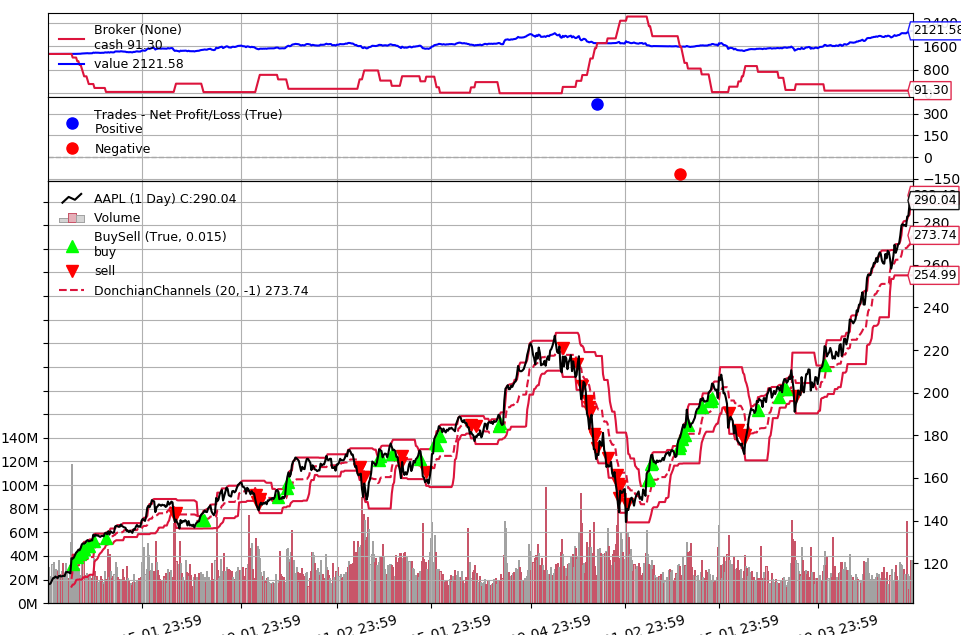

[[<Figure size 640x480 with 4 Axes>]]

In [10]:
cerebro.plot(width=22,height=12)